In [1]:
import pickle
best_params = pickle.load(open("../pickle_files/baseline.pickle", "rb"))
best_params

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 9,
 'min_child_weight': 1,
 'subsample': 1.0}

In [1]:
!pip install pandas numpy nltk scikit-learn wordcloud seaborn gensim tensorflow imblearn xgboost matplotlib unrar pyunpack more-itertools patool keras-tqdm > /dev/null

The system cannot find the path specified.


In [2]:
import pandas as pd
import sklearn
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import nltk

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from nlp_ai_utils import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df1 = pd.read_csv("../larger_dataset/data_chunks/chunk_1.csv")
df2 = pd.read_csv("../larger_dataset/preprocessed_data_chunks/chunk_1.csv")

In [9]:
text = df1['text'][0]

In [18]:
text

"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."

In [12]:
remove_stop_words(text)

"decide eat , aware going take 2 hours beginning end . tried multiple times , want like ! 's locations NJ never bad experience . food good , takes long time come . waitstaff young , usually pleasant . many experiences spent way long waiting . usually opt another diner restaurant weekends , order done quicker ."

In [14]:
process_corpus(remove_stop_words(text))

'decide eat aware go take 2 hour begin end try multiple time want like s location nj never bad experience food good take long time come waitstaff young usually pleasant many experience spend way long wait usually opt another diner restaurant weekend order do quicker'

In [15]:
remove_stop_words(process_corpus(text))

'decide eat aware go take 2 hour begin end try multiple time want like location nj never bad experience food good take long time come waitstaff young usually pleasant many experience spend way long wait usually opt another diner restaurant weekend order quicker'

In [16]:
process_corpus(remove_stop_words(text))

'decide eat aware go take 2 hour begin end try multiple time want like s location nj never bad experience food good take long time come waitstaff young usually pleasant many experience spend way long wait usually opt another diner restaurant weekend order do quicker'

In [7]:
df2['text'][0]

'decide eat aware go take 2 hour begin end try multiple time want like s location nj never bad experience food good take long time come waitstaff young usually pleasant many experience spend way long wait usually opt another diner restaurant weekend order do quicker'

In [7]:
test_list = ['love','hate','peace','pizza']

In [8]:
sid = SentimentIntensityAnalyzer()
sent_polarity_words = [sid.polarity_scores(item) for item in test_list]

In [13]:
sent_polarity_words[3]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [5]:
df = pd.read_csv("../smaller_dataset/yelp coffee/raw_yelp_review_data_processed.csv")
df_unprocessed = pd.read_csv("../smaller_dataset/yelp coffee/raw_yelp_review_data.csv")

In [24]:
X = df['full_review_text']

y = df['star_rating']

In [7]:
y

0       5
1       4
2       4
3       2
4       4
       ..
6910    4
6911    5
6912    4
6913    3
6914    4
Name: star_rating, Length: 6915, dtype: int64

In [8]:
def encode_sent(sentiments,positive_label = 1,negative_label = 2,neutral_label = 3):
    """
    This function takes in all translated labels (labels transformed for star ratings to sentiments), and converts them to numerical values.

    positive_label: x => Positive Integer, Default = 1

    negative_label: x => Positive Integer, Default = 2

    neutral_label: x => Positive Integer, Default = 3

    """
    translated_labels = sentiments
    encoded_sent = []
    for label in translated_labels:
        if label == 'Positive Sentiment':
            encoded_sent.append(positive_label)
        elif label == 'Negative Sentiment':
            encoded_sent.append(negative_label)
        else:
            encoded_sent.append(neutral_label)
    return encoded_sent

In [9]:
translated_labels = translate_labels(y)

In [10]:
encoded_labels = encode_sent(translated_labels,3,1,2)

In [11]:
encoded_labels

[3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,


In [12]:
translated_labels = translate_labels(y)
y = pd.Series(encode_sent(translated_labels))

In [13]:
y.unique()

array([1, 2, 3], dtype=int64)

In [18]:
samples = get_classes_count(y,start_label = 1)

In [19]:
class_weights = compute_class_weight('balanced', classes=list(y.unique()), y=y)

In [20]:
LABELS_COUNT = len(y.unique())

In [21]:
LABELS_COUNT

3

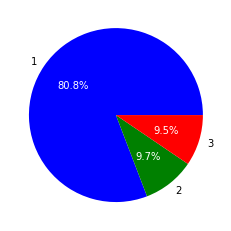

In [22]:
visualize_ratings_pie(y,use_dict = samples)

In [33]:
test1 = range(1,6)
test2 = [1,2,3,4,5]

print(test1 == test2)

print(test1)

False
range(1, 6)


In [26]:
def tokenize_review(text):
    return nltk.word_tokenize(text)

In [34]:
reviews_tokens = [tokenize_review(review) for review in X]

In [35]:
model = Word2Vec(sentences=reviews_tokens, vector_size=100, window=5, min_count=1, workers=4)
# model.save("test_w2v.model")

In [36]:
X = np.zeros((len(reviews_tokens), model.vector_size))
labels = y
for i, review in enumerate(reviews_tokens):
    for word in review:
        if word in model.wv:
            X[i] += model.wv[word]
    X[i] /= len(reviews_tokens)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,labels,stratify=labels,test_size=0.2,random_state=42)

In [69]:
# smote = SMOTE(random_state = 42)
# x_train,y_train = smote.fit_resample(x_train,y_train)

In [73]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)

In [74]:
accuracy

0.5488069414316703

In [75]:
test_review = "I like this place, but it is not my favourite at all."
test_token = nltk.word_tokenize(test_review)
test_vector = np.zeros(model.vector_size)
for word in test_token:
    if word in model.wv:
        test_vector += model.wv[word]
test_vector /= len(test_token)
predicted_label = clf.predict([test_vector])[0]

In [76]:
predicted_label

4